## FetchMaker
Congratulations! You’ve just started working at the hottest new tech startup, FetchMaker. FetchMaker’s mission is to match up prospective dog owners with their perfect pet. FetchMaker has been collecting data on their adoptable dogs, and it’s your job to analyze some of that data.

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import binom_test
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import seaborn as sns

dogs = pd.read_csv('dog_data.csv')

### Data to the Rescue

Use the .head() method to inspect the first five rows of the dataset.

In [2]:
print(dogs.head())

   is_rescue  weight  tail_length  age  color  likes_children  \
0          0       6         2.25    2  black               1   
1          0       4         5.36    4  black               0   
2          0       7         3.63    3  black               0   
3          0       5         0.19    2  black               0   
4          0       5         0.37    1  black               1   

   is_hypoallergenic      name      breed  
0                  0      Huey  chihuahua  
1                  0   Cherish  chihuahua  
2                  1     Becka  chihuahua  
3                  0     Addie  chihuahua  
4                  1  Beverlee  chihuahua  


FetchMaker estimates (based on historical data for all dogs) that 8% of dogs in their system are rescues. They would like to know if whippets are significantly more or less likely than other dogs to be a rescue.

How many whippets are rescues (remember that the value of is_rescue is 1 for rescues and 0 otherwise)? Save this number as num_whippet_rescues and print it out.

In [3]:
whippet_rescue = dogs.is_rescue[dogs.breed == 'whippet']
num_whippet_rescues = np.sum(whippet_rescue == 1)
print(num_whippet_rescues)

6


How many whippets are in this sample of data in total? Save this number as num_whippets and print it out.

In [4]:
num_whippets = len(whippet_rescue)
print(num_whippets)

100


Use a hypothesis test to test the following null and alternative hypotheses:
- Null: 8% of whippets are rescues
- Alternative: more or less than 8% of whippets are rescues

Save the p-value from this test as pval and print it out. Using a significance threshold of 0.05, Is the proportion of whippets who are rescues significantly different from 8%?

In [6]:
pval = binom_test(num_whippet_rescues, num_whippets, 0.08, alternative = 'two-sided')
print('The p-value is equal to', pval)
print ('the significance threshold is significant' if pval < 0.05 else 'the significance threshold is not significant')

The p-value is equal to 0.5811780106238098
the significance threshold is not significant


### Mid-Sized Dog Weights

Three of FetchMaker’s most popular mid-sized dog breeds are 'whippet's, 'terrier's, and 'pitbull's. Is there a significant difference in the average weights of these three dog breeds?

To start answering this question, save the weights of each of these breeds in three separate series named wt_whippets, wt_terriers, and wt_pitbulls, respectively.

In [7]:
wt_whippets = dogs.weight[dogs.breed == 'whippet']
wt_terriers = dogs.weight[dogs.breed == 'terrier']
wt_pitbulls = dogs.weight[dogs.breed == 'pitbull']

Run a single hypothesis test to address the following null and alternative hypotheses:
- Null: whippets, terriers, and pitbulls all weigh the same amount on average
- Alternative: whippets, terriers, and pitbulls do not all weigh the same amount on average (at least one pair of breeds has differing average weights)

Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of dog breeds that have significantly different average weights?

In [11]:
fstat, pval = f_oneway(wt_whippets, wt_terriers, wt_pitbulls)
print('The p-value is equal to', pval)
print ('the significance threshold is significant' if pval < 0.05 else 'the significance threshold is not significant')

The p-value is equal to 3.276415588274815e-17
the significance threshold is significant


If you completed the previous step correctly, you should have concluded that at least one pair of dog breeds have significantly different average weights.

Run another hypothesis test to determine which of those breeds (whippets, terriers, and pitbulls) weigh different amounts on average. Use an overall type I error rate of 0.05 for all three comparisons.

Print out the results. Which pairs of dog breeds weigh different amounts?

In [12]:
dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]
tukey_dogs = pairwise_tukeyhsd(dogs_wtp.weight, dogs_wtp.breed, 0.05)
print(tukey_dogs)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
pitbull terrier   -13.24  0.001 -16.728 -9.752   True
pitbull whippet    -3.34 0.0639  -6.828  0.148  False
terrier whippet      9.9  0.001   6.412 13.388   True
-----------------------------------------------------


### Poodle and Shihtzu Colors

FetchMaker wants to know if 'poodle's and 'shihtzu's come in different colors. use the subsetted data to create a contingency table of dog colors by breed (poodle vs. shihtzu). Save the table as Xtab and print it out.

In [13]:
dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]
Xtab = pd.crosstab(dogs_ps.color, dogs_ps.breed)
print(Xtab)

breed  poodle  shihtzu
color                 
black      17       10
brown      13       36
gold        8        6
grey       52       41
white      10        7


Run a hypothesis test for the following null and alternative hypotheses:
- Null: There is an association between breed (poodle vs. shihtzu) and color.
- Alternative: There is not an association between breed (poodle vs. shihtzu) and color.

Save the p-value as pval and print it out. Do poodles and shihtzus come in significantly different color combinations? Use a significance threshold of 0.05.

In [15]:
chi2, pval, dof, expected = chi2_contingency(Xtab)
print('The p-value is equal to', pval)
print ('the significance threshold is significant' if pval < 0.05 else 'the significance threshold is not significant')

The p-value is equal to 0.005302408293244593
the significance threshold is significant


Extra challenge: Remind yourself of your data visualization skills and your ability to describe the central tendency of the data. For example, a boxplot visualization can add a lot to your understanding of an ANOVA result.

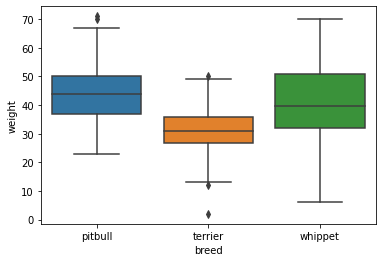

In [20]:
dogs_wtp_boxplot = sns.boxplot(data = dogs_wtp, x = dogs_wtp.breed, y = dogs_wtp.weight)